### 1. Importing required Python packages

In [1]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.preprocessing import LabelEncoder
import copy

### 2. Reading the data from the file into a data frame

In [2]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 3a.Shape of the data

In [3]:
print('Shape of the data is:',df.shape);

Shape of the data is: (1338, 7)


#### <font color='green'>Answer : The data has 1338 rows with 7 attributes</font>

### 3b. Data type of each attribute

In [4]:
df.dtypes
# alternately, df.info() can also be used

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### <font color='green'>Answer : The data types are integer[Age,Children], float[bmi,charges] and object [sex,smoker,region]</font>

### 3c. Presence of Missing Values

In [5]:
n_missingvalues=df.isnull().values.sum()
if (n_missingvalues==0):
    print ("There are no missing values in the data")

There are no missing values in the data


In [6]:
df.isna().apply(pd.value_counts) 

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


#### <font color='green'>Answer : From the above two results, it is verified that there are no missing values in the data</font>

### 3d. 5 point summary of numerical attributes

In [7]:
df.describe().filter(items=['age','bmi','children','charges']).loc[['min','25%','50%','75%','max']]

,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


#### <font color='green'>The 5-point summary of numerical attributes age, bmi, children, charges are listed above</font>

### 3e. Distributions

#### Distribution of "Age" column

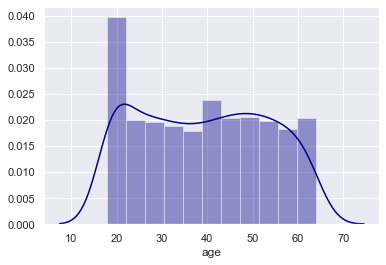

In [8]:
sns.distplot(df['age'],hist=True,kde=True,color = 'darkblue');

#### <font color='blue'>Answer : Age seems to have a uniform distribution</font>

#### Distribution of "BMI" column

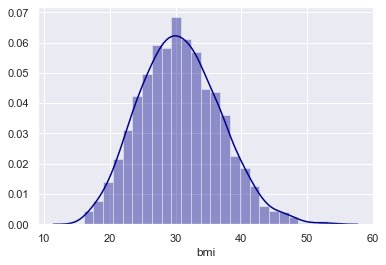

In [9]:
sns.distplot(df['bmi'],hist=True,kde=True,color = 'darkblue');

#### <font color='blue'>Answer : BMI seems to have a smooth normal distribution</font>

#### Distribution of "Charges" column

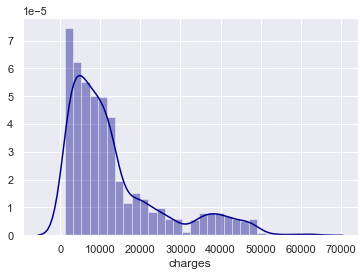

In [10]:
sns.distplot(df['charges'],hist=True,kde=True,color = 'darkblue');

#### <font color='blue'>Answer : Charges seems to have a positive skewed distribution (right tail) </font>

#### <font color='green'>Answer : Distribution of numerical columns Age, BMI and charges are provided in the above plots</font>

### 3f. Measure of skewness

In [11]:
skew_age = stats.skew(df['age'], axis=0, bias=True)
skew_bmi = stats.skew(df['bmi'], axis=0, bias=True)
skew_charges = stats.skew(df['charges'], axis=0, bias=True)
print("Measure of skewness for Age : ",round(skew_age,3));
print("Measure of skewness for BMI : ",round(skew_bmi,3));
print("Measure of skewness for Charges : ",round(skew_charges,3));

Measure of skewness for Age :  0.056
Measure of skewness for BMI :  0.284
Measure of skewness for Charges :  1.514


#### <font color='green'>Answer : Measure of skewness of <br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Age : 0.056<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;BMI : 0.284<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Charges : 1.514<br><br>As seen in the above distributon plots<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Age is uniformly distributed with very less skew<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;BMI skewness is very less<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Skewness in charges is high</font>

### 3g. Checking the presence of outliers

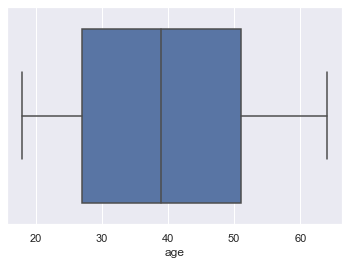

In [12]:
sns.boxplot(df['age'],orient='h');

#### <font color='blue'>Age does not seem to have any outliers</font>

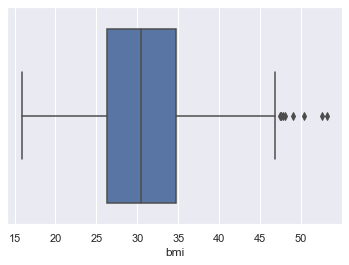

In [13]:
sns.boxplot(df['bmi'],orient='h');

#### <font color='blue'>BMI has a few outliers</font> 

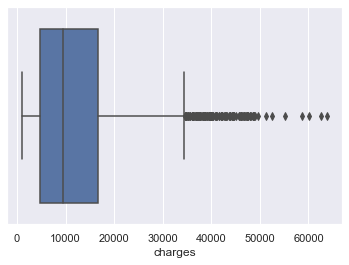

In [14]:
sns.boxplot(df['charges'],orient='h');

#### <font color='blue'>Charges has many outliers as it is a highly skewed distribution. The right segment of the box is longer than the left segment, indicating a high positive skewness</font>

#### <font color='green'>Answer : Outliers for Age, BMI and Charges are indicated using the above Box Plots for these attributes</font>

### 3h. Distribution of categorical columns

#### Distribution of Males & Females

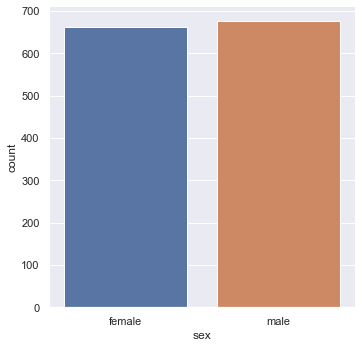

In [15]:
sns.catplot(x="sex", kind="count", data=df);

#### <font color='blue'>Males and females are evenly distributed in the data set</font>

#### Distribution of Number of Children

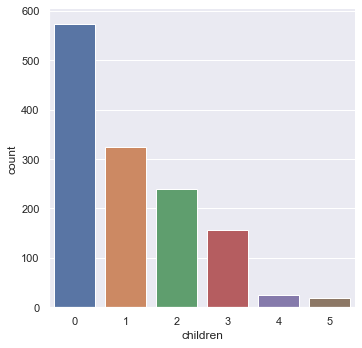

In [16]:
sns.catplot(x="children", kind="count", data=df);

#### <font color='blue'>There are more number of rows in the data set with 2 children or lesser</font>

#### Distribution of Smokers and Non-smokers

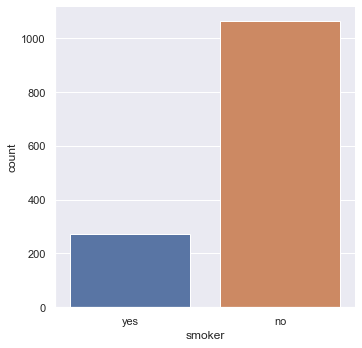

In [17]:
sns.catplot(x="smoker", kind="count", data=df);

#### <font color='blue'>There are many non-smokers compared to smokers, in the data set</font> 

#### Distribution of different geographical regions

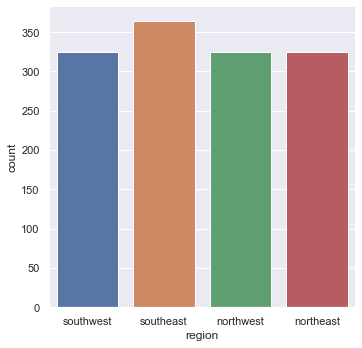

In [18]:
sns.catplot(x="region", kind="count", data=df);

#### <font color='blue'>The members in the data set are almost evenly distributed across the four regions SW, SE, NW and NE</font>

#### <font color='green'>Answer : Distribution of all categorical columns are provided in the above plots</font>

### 3i. Pair plots for all columns

#### The answer requires pair plotting for all columns of the data frame, numeric and categorical. sns.pairplot(df), by default, plots only numerical attributes. Here, we label encode the categorical attributes in order to do the plot for categorical variables also. 

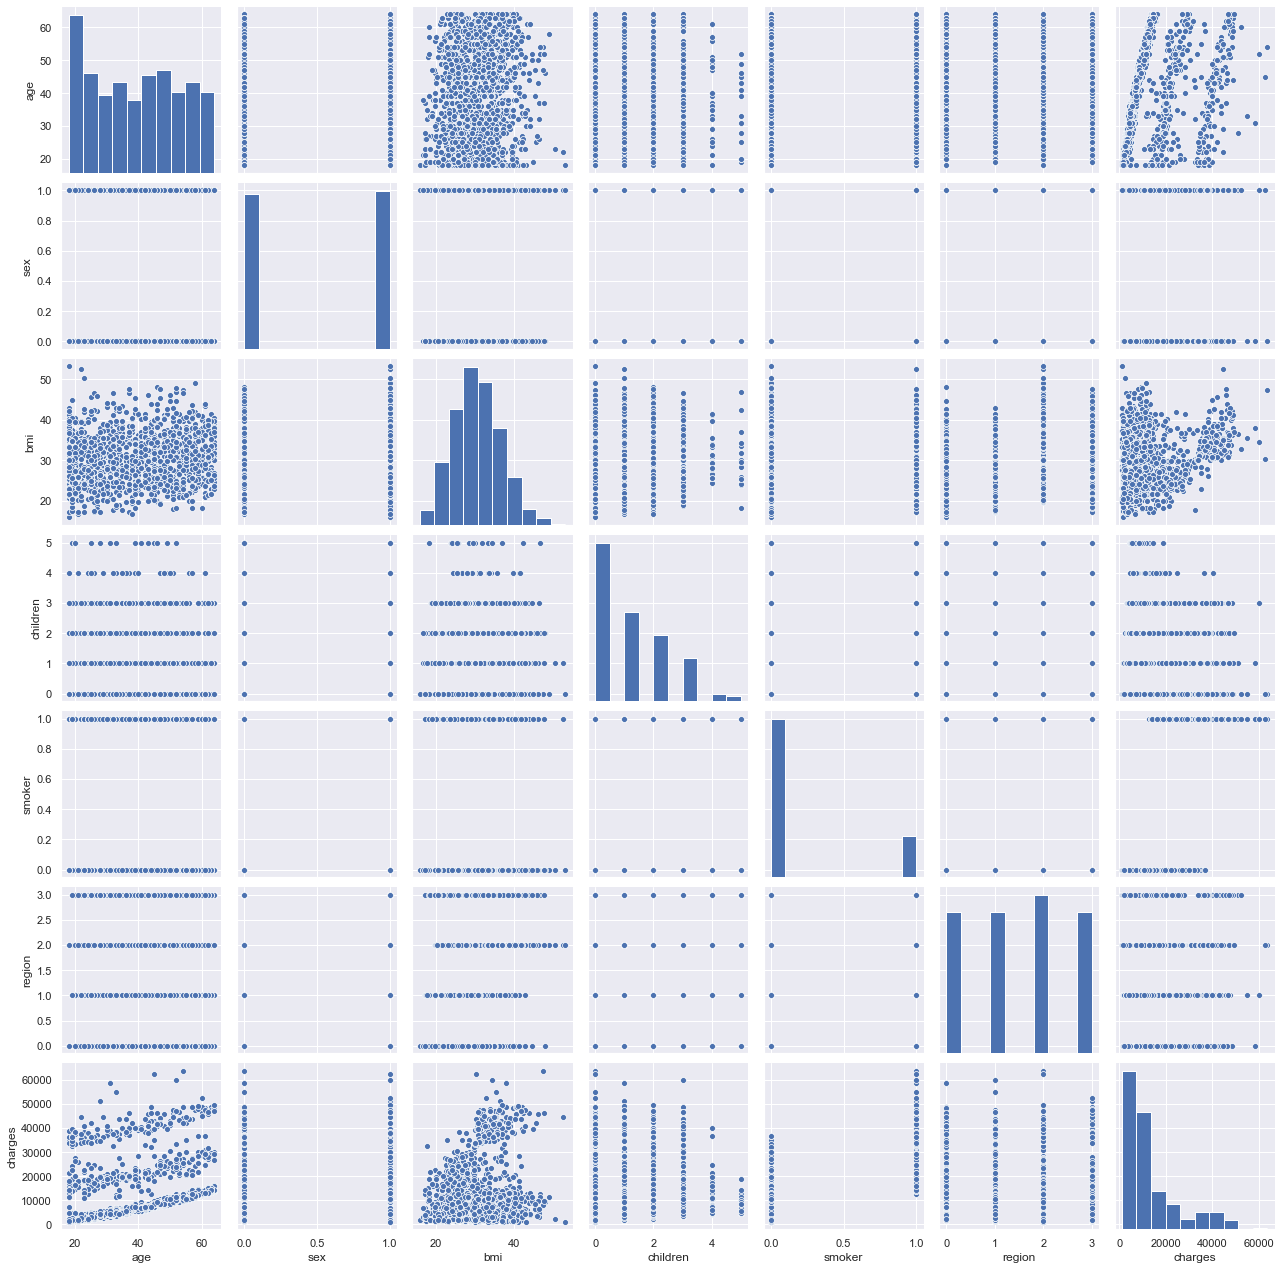

In [19]:
df_enc = copy.deepcopy(df)
df_enc.loc[:,['sex', 'smoker', 'region']] = df_enc.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(df_enc)  #pairplot
plt.show()

#### <font color='blue'>Inferences from the pair plot<br>1. The charges of smokers seem to be higher than non-smokers<br>2. The charges for older people appear to be higher than for younger people</font>

#### <font color='green'>Answer : Pair plots for all numerical and categorical columns are displayed above</font>

### 4a. Charges of smokers vs non-smokers

#### <font color='blue'>Null hypothesis Ho: The two groups viz. smokers and non-smokers have the same mean charges</font>
####  <font color='blue'>Alternate hypothesis Ha: there is a significant difference in the mean of charges between smokers and non-smokers</font>

In [20]:
# Separating the charges of smokers and non-smokers
smokers = df['smoker'] == 'yes'
smokercharges = df[smokers]['charges']

nonsmokers = df['smoker'] == 'no'
nonsmokercharges = df[nonsmokers]['charges']

In [21]:
# two-sample t-test
t_statistic, p_value = ttest_ind(smokercharges,nonsmokercharges)
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


In [22]:
# p_value < 0.05 => alternative hypothesis is supported
# charges of smokers and non-smokers don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 8.271435842177219e-283


#### <font color='green'>Answer : The p_value is <<< 0.05 (considering a confidence interval of 95%), which indicates that the null hypothesis can be rejected. It can be concluded that the charges of people who smoke differ significantly from the people who don't</font>

### 4b. BMIs of males vs females

#### <font color='blue'>Null hypothesis Ho: The BMIs of males and females do not differ significantly</font>
#### <font color='blue'>Alternate hypothesis Ha: There is a significant difference in the BMIs of males and females</font>

In [23]:
# Separating the BMIs of males and females
bmi_males = df['sex'] == 'male'
bmi_males = df[bmi_males]['bmi']

bmi_females = df['sex'] == 'female'
bmi_females = df[bmi_females]['bmi']

In [24]:
# two-sample t-test
# null hypothesis: The BMIs of males and females do not differ significantly
# alternate hypothesis : There is a significant difference in the BMIs of males and females
t_statistic, p_value = ttest_ind(bmi_males,bmi_females)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


#### <font color='green'>Answer : The p_value is ~0.09 > 0.05 (considering a confidence interval of 95%), which indicates that the <i>null hypothesis cannot be rejected</i>. Hence, there is no significant difference in the BMIs of males and females</font>

### 4c. Proportion of smokers - Gender variance [Test of Proportions]

####  <font color='blue'>Null hypothesis Ho: The proportion of male and female smokers do not differ significantly</font>
####  <font color='blue'>Alternate hypothesis Ha: There is a significant difference in the proportion of male and female smokers</font>

In [25]:
# Number of  male and female smokers in the data set
smoker_males = df[df['sex'] == 'male'].smoker.value_counts()[1]
smoker_females = df[df['sex'] == 'female'].smoker.value_counts()[1]

# Total number of males and females in the data set
n_males = df.sex.value_counts()[0]
n_females = df.sex.value_counts()[1]

print ('Male smokers: ',smoker_males,'/',n_males,'Proportion : [',round(smoker_males/n_males,2),']')
print ('Female smokers: ',smoker_females,'/',n_females,'Proportion : [',round(smoker_females/n_females,2),']')

Male smokers:  159 / 676 Proportion : [ 0.24 ]
Female smokers:  115 / 662 Proportion : [ 0.17 ]


In [26]:
# Test of proportions based on normal Z-test
z_statistic, p_value = proportions_ztest([smoker_females, smoker_males] , [n_females, n_males])
p_value

0.005324114164320532

#### <font color='green'>Answer : The p_value is ~0.005 <<< 0.05 (considering a confidence interval of 95%), which indicates that the null hypothesis can be rejected. Hence, there is a significant difference in the proportions of male and female smokers</font>

### 4d. BMI distribution vs # of children

#### <font color='blue'>Null hypothesis Ho: The distribution of BMIs across women with {0,1,2} children are the same</font>
#### <font color='blue'>Alternate hypothesis Ha: The distributions of BMIs for women having different number of children, are significantly different</font>

In [27]:
female_df = df[df['sex'] == 'female']  # Separate the women from the dataset

df_0kids = female_df[female_df.children == 0]['bmi'] # Women with 0 children
df_1kid = female_df[female_df.children == 1]['bmi'] # Women with 1 child
df_2kids = female_df[female_df.children == 2]['bmi'] # Women with 2 children


f_statistic, p_value = stats.f_oneway(df_0kids,df_1kid,df_2kids)
f_statistic, p_value

(0.3344720147757968, 0.7158579926754841)

#### <font color='green'>Answer : The p_value is ~0.716 > 0.05 (considering a confidence interval of 95%), which indicates that the null hypothesis cannot be rejected. Hence, it is concluded that there is no statistically significant difference in the BMIs of women with {0,1,2} children</font>